<a href="https://colab.research.google.com/github/Nathalia-Prada/Sinergia_Bootcamp/blob/main/02_Caso_1_Wine_Dataset_for_Clustering/Punto_2_Caso_1_Wine_Dataset_for_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 2
2.	Despliegue un clustering K-Means para el siguiente caso de estudio. De modo que se pueda perfilar los grupos del clúster.


# Caso 1
# Wine Dataset for Clustering


### 2024.11.12


- Es importante perfilar los grupos de cada caso


## Download the dataframe from Kaggle
Install the kaggle python library

In [1]:
!pip install --user kaggle

Mount the Google drive so you can store your kaggle API credentials for future use

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import os

# Define the dataset file path
# Este es el nombre del file que estamos explorando en kaggle:
FILE = "harrywang/wine-dataset-for-clustering"

Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.

In [4]:
! mkdir ~/.kaggle

Upload the json file to Google Drive and then copy to the temporary location.

In [5]:
!cp /content/drive/MyDrive/Bootcamp/kaggle.json ~/.kaggle/kaggle.json

Change the file permissions to read/write to the owner only

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

### Competitions and Datasets are the two types of Kaggle data

####1. Download competition data

If you get 403 Forbidden error, you need to click 'Late Submission' on the Kaggle page for that competition.

In [7]:
#! kaggle competitions download -c air-heart-disease

To downloaad specific files, instead of the entire data set

In [8]:

#! kaggle competitions download digit-recognizer -f train.csv

#### 2. Download datasets (that are not part of competition)

> Add blockquote



In [9]:
!kaggle datasets download -d $FILE

Dataset URL: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering
License(s): copyright-authors
  0% 0.00/4.36k [00:00<?, ?B/s]
100% 4.36k/4.36k [00:00<00:00, 728kB/s]


#### 3. Unzip files if required

In [10]:
# Find the most recent file in the directory (assuming it is the downloaded file)
import glob
import zipfile

# Find the most recent file in the directory (assuming it is the downloaded file)
downloaded_files = glob.glob("*.zip")  # Looks for zip files in the current directory
if downloaded_files:
    latest_file = max(downloaded_files, key=os.path.getctime)  # Get the most recent file
    print(f"Downloaded file: {latest_file}")

    # Check if it's a zip file and unzip it
    if zipfile.is_zipfile(latest_file):
        print(f"Unzipping {latest_file}...")
        with zipfile.ZipFile(latest_file, 'r') as zip_ref:
            zip_ref.extractall()  # Extract to the current directory
        print(f"{latest_file} unzipped successfully.")
        !rm *.zip
    else:
        print(f"{latest_file} is not a zip file.")
else:
    print("No zip file found.")

Downloaded file: wine-dataset-for-clustering.zip
Unzipping wine-dataset-for-clustering.zip...
wine-dataset-for-clustering.zip unzipped successfully.


#### 4. Load the CSV dataset in a Pandas Dataframe

In [11]:
import pandas as pd

# Find all CSV files in the current directory
csv_files = glob.glob('*.csv')

# Check if any CSV files were found
if csv_files:
    # Load the first CSV file into a DataFrame
    df = pd.read_csv(csv_files[0])

    # Display the info of the DataFrame
    print(f"DataFrame loaded from: {csv_files[0]}")
    print(df.info())
else:
    print("No CSV files found in the current directory.")

DataFrame loaded from: wine-clustering.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


In [12]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [13]:
# Percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print(missing_percentage)

Alcohol                 0.0
Malic_Acid              0.0
Ash                     0.0
Ash_Alcanity            0.0
Magnesium               0.0
Total_Phenols           0.0
Flavanoids              0.0
Nonflavanoid_Phenols    0.0
Proanthocyanins         0.0
Color_Intensity         0.0
Hue                     0.0
OD280                   0.0
Proline                 0.0
dtype: float64


# Data Cleaning

In [14]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


## EDA

### Correlations Matrix

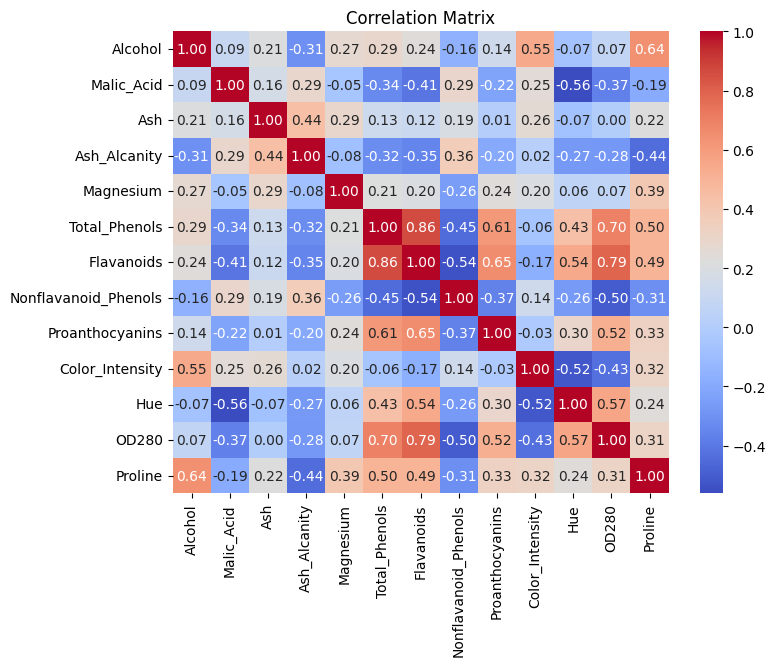

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Description

In [16]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00
